# Euclid Testing

This is an example notebook showing the Euclid Dynamic Testing code written by Chris in action.

In [1]:
from DynamicTesting import * 

import numpy as np
from matplotlib import pyplot as plt

# Make sure we have access to the higher level directory.
import sys
sys.path.insert(0, '../')

# Set the redshift of interest here.
redshift = 0.0

The variables we wish to test are listed in arrays for easy repeated access.

In [2]:
# Variations
iterations = 4
#dutycycle = ["Mann", "Schulze", 0.1, 0.05]
edd = [0.5, 1, 1.5, 2.0]

Next we create the class, and we call the approprate member functions to read in the data, assign the variables we want and then return the plotting data. Much of the best behaviour is encapsulated by the default arguments, so some parameters do not need to be called. Running this section can take some time.

Note that calling the member function to load in the multidark data expects a file in a subfolder '/BigData/' that is named 'MD_<redshift>.npy, in with the columns x, y, z, scale at accretion, mass at accretion, and (for testing purposes) mvir.

In [3]:
# Create the master class. Only requires the redshift.
obj = EuclidMaster()
obj.setRedshift(redshift)
# Load in the MultiDark Haloes.
obj.loadMultiDarkHaloes()
# Stellar mass, default prescription Grylls 18.
obj.assignStellarMass()
# Black hole mass, default, Shankar 16.
obj.assignBlackHoleMass()
# We assign the Duty Cycle, which is set to Mann. This could be inside the loop below if variations are desired.
obj.assignDutyCycle()

Loading MultiDark Haloes


/Volumes/Files/EuclidAGN/DynamicTesting.py:101: RuntimeWarning: divide by zero encountered in log10
  hist = np.histogram(np.log10(data[:, 5]/self.h), bins = bins)[0]


Assigning Stellar Mass
Assigning Black Hole Mass
Assigning Duty Cycle, Mann


In [4]:
# Loop to support variations in parameters
for i in range(iterations):
    #function = dutycycle[i]) # This is the thing we are varying
    
    # Assign Eddinton Ratios and also the Lx
    obj.assignEddingtonRatios(knee = edd[i])
    # The CreateCatalogue function creates a catalogue from the duty cycle, and performs the luminosity cut.
    obj.CreateCatalogue()
    # The Obscuration will assign Nh and only select obscured galaxies by default.
    obj.Obscuration()
    # We then compute wp on this catalogue, and extract the data.
    obj.computeWP()

Assigning Eddington Ratios
Creating Catalogue
    0.89% of Galaxies remain as AGN
Calculating Obscuration
    90.99% of the remaining catalogue remains as obscured
Computing wp


In gridlink_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 46,46,29.  Time taken =   0.169 sec
Using AVX2 kernel
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.582 secs


Assigning Eddington Ratios
Creating Catalogue
    0.9% of Galaxies remain as AGN
Calculating Obscuration
    88.25% of the remaining catalogue remains as obscured
Computing wp


In gridlink_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 46,46,29.  Time taken =   0.159 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.586 secs


Assigning Eddington Ratios
Creating Catalogue
    0.91% of Galaxies remain as AGN
Calculating Obscuration
    89.33% of the remaining catalogue remains as obscured
Computing wp


In gridlink_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 46,46,29.  Time taken =   0.173 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.492 secs


Assigning Eddington Ratios
Creating Catalogue
    0.91% of Galaxies remain as AGN
Calculating Obscuration
    94.71% of the remaining catalogue remains as obscured
Computing wp


In gridlink_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 46,46,29.  Time taken =   0.170 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.642 secs


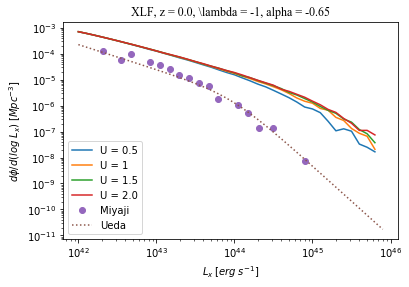

In [5]:
# Plot of the XLF

plt.figure()

for i in range(iterations):
    plt.plot(10**obj.XLF_plottingData[i].x, 10**obj.XLF_plottingData[i].y, label = r"U = {}".format(edd[i]))
    
    
# XLF Data
XLF = XLF_Data(redshift)
plt.plot(10**XLF.Mi_LX, 10**XLF.Mi_phi, 'o', label = "Miyaji")

uXLF, ubins = XLF.getUeda14(np.arange(42, 46, 0.1))
plt.plot(10**ubins, 10**uXLF, ':', label = "Ueda")

# Plotting
plt.xlabel(r'$L_x\;[erg\;s^{-1}]$')
plt.ylabel(r'$d\phi /d(log\;L_x)\;[Mpc^{-3}]$')
plt.title(r'XLF, z = {}, \lambda = {}, alpha = {}'.format(redshift, -1, -0.65), fontname = 'Times New Roman')
plt.loglog()
plt.legend()
plt.show()

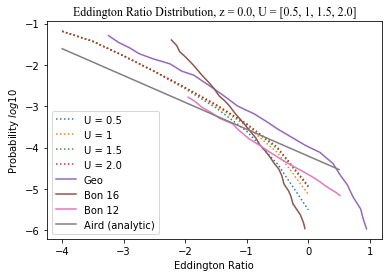

In [6]:
# Plot the Eddington ratio distribution

plt.figure()

for i in range(iterations):
    plt.plot(obj.Edd_plottingData[i].x, obj.Edd_plottingData[i].y, ':', label = r"U = {}".format(edd[i]))

EddData = EddingtonDistributionData(redshift)
plt.plot(EddData.Geo_LX, EddData.Geo_phi, label = "Geo")
plt.plot(EddData.Bon16_LX, EddData.Bon16_phi, label = "Bon 16")
plt.plot(EddData.Bon12_LX, EddData.Bon12_phi, label = "Bon 12")

eddbin = np.arange(-4, 1., 0.5)
probSche = EddData.AirdDist(eddbin)
plt.plot(eddbin, probSche, label = "Aird (analytic)")
plt.title(r'Eddington Ratio Distribution, z = {}, U = {}'.format(redshift, edd), fontname = 'Times New Roman')
plt.xlabel("Eddington Ratio")
plt.ylabel("Probability $log10$")

plt.legend()

  
plt.show()


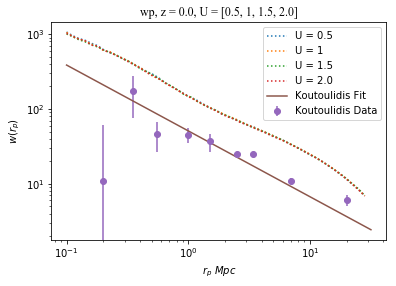

In [7]:
plt.figure()

wp_data = WP_Data(redshift)

for i in range(iterations):
    plt.plot(obj.WP_plottingData[i].x, obj.WP_plottingData[i].y, ':', label = r"U = {}".format(edd[i]))

plt.errorbar(wp_data.r_Koutoulidis, wp_data.wp_Koutoulidis,\
                yerr = wp_data.wp_Koutoulidis_e, fmt='o', label = "Koutoulidis Data")

plt.plot(obj.wpbins, wp_data.K_powerLaw(obj.wpbins), label = "Koutoulidis Fit")
plt.title(r'wp, z = {}, U = {}'.format(redshift, edd), fontname = 'Times New Roman')    
plt.xlabel(r'$r_p$ $Mpc$')
plt.ylabel(r'$w(r_p)$')    

plt.legend()
plt.loglog()
plt.show()
